<a href="https://colab.research.google.com/github/igormatheusdiniz/ri_lab_03/blob/master/ri_lab3_igor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

import nltk
nltk.download('rslp')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [0]:
url = 'https://raw.githubusercontent.com/Benardi/ri_lab_01/master/output/results.csv'

Utilizei a base de dados de Benardi, e por motivos de não precisar importar o .csv toda vez ao inicializar o colab, defini a url em meu lab.

In [0]:
dataframe = pd.read_csv(url)

# Tratamento dos dados

Diferente do lab anterior onde para obter os tokens, não utilizei o método tokenize do ntlk, para atender as especificações do lab atual, atualizei a forma que recupero os tokens do meu texto.

In [0]:
setences = ''.join(dataframe.text).lower()
regex = RegexpTokenizer(r'[A-zÀ-ú-]+')
word_tokens = regex.tokenize(setences)


#Questão 1

Abaixo tratei os meus tokens seguindo os critérios da seguinte maneira:

*   Todas as palavras minúsculas: Evitar transtornos de pesquisa entre carcateres maiusculos e minusculos 
*   Retirar stop-words: Os stop-words podem ser danosos a pesquisa. A retirada deles melhora o tempo de resposta e efetividade
*  Apostofre foram descartadas: No idioma "português não tem-se tanta influência da ocorrência do apóstrofe"
* Foram preservadas palavras com acentuação: Em alguns casos palavras acentuadas de maneiras diferentes refletem pesquisas diferentes.
* Também foram preservados tokens númericos: Algumas pesquisas por anos ou números expressivos a interesse do usuário podem ser importantes





In [90]:
list_aux = []

for word in word_tokens:
  if len(word) > 3 and word[0] != "[" and word[-1]!="]": 
    list_aux.append(word)
    
list_aux

['juíza',
 'federal',
 'ivani',
 'silva',
 'brasília',
 'proibiu',
 'caráter',
 'liminar',
 'nesta',
 'sexta-feira',
 'forças',
 'armadas',
 'comemorarem',
 'especialmente',
 'dinheiro',
 'público',
 'aniversário',
 'golpe',
 'estado',
 'instaurou',
 'ditadura',
 'militar',
 'brasil',
 'militares',
 'preferem',
 'março',
 'abril',
 'partiu',
 'presidente',
 'ultradireita',
 'jair',
 'bolsonaro',
 'depois',
 'tentou',
 'suavizar',
 'ordem',
 'citando',
 'para',
 'rememorar',
 'para',
 'silva',
 'texto',
 'divulgado',
 'pelo',
 'ministério',
 'defesa',
 'como',
 'ordem',
 'alusiva',
 'março',
 'lida',
 'alguns',
 'quartéis',
 'compatível',
 'processo',
 'reconstrução',
 'democrática',
 'promovido',
 'pela',
 'constituição',
 'desobedece',
 'princípio',
 'prevalência',
 'direitos',
 'humanos',
 'ignora',
 'decisão',
 'corte',
 'interamericana',
 'direitos',
 'humanos',
 'condenou',
 'estado',
 'brasileiro',
 'apurar',
 'julgar',
 'responsáveis',
 'pela',
 'morte',
 'jornalista',
 'vladimi

# Questão 2

Para adicionar as colunas de rank(r), Probabilidade(Pr) e C(rPr), implementa-se o código abaixo.

In [91]:
totalWords = len(list_aux)
words = pd.DataFrame(list_aux, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')
word_counts['Pr'] =  (word_counts.freq / totalWords)*100
word_counts['rPr'] = (word_counts.r*word_counts.Pr)/100
print(totalWords)
word_counts

124892


,word,freq,r,Pr,rPr
0,para,2322,1.0,1.859206,0.018592
1,como,1329,2.0,1.064119,0.021282
2,mais,1206,3.0,0.965634,0.028969
3,anos,584,4.0,0.467604,0.018704
4,também,498,5.0,0.398745,0.019937
5,pelo,489,6.0,0.391538,0.023492
6,pela,467,7.0,0.373923,0.026175
7,isso,444,8.0,0.355507,0.028441
8,sobre,426,9.0,0.341095,0.030699
9,entre,420,10.0,0.336291,0.033629


Selecionando as 50 palavras mais frequentes dentre todo o resultado temos a tabela abaixo.

In [92]:
word_counts.loc[0:50]

,word,freq,r,Pr,rPr
0,para,2322,1.0,1.859206,0.018592
1,como,1329,2.0,1.064119,0.021282
2,mais,1206,3.0,0.965634,0.028969
3,anos,584,4.0,0.467604,0.018704
4,também,498,5.0,0.398745,0.019937
5,pelo,489,6.0,0.391538,0.023492
6,pela,467,7.0,0.373923,0.026175
7,isso,444,8.0,0.355507,0.028441
8,sobre,426,9.0,0.341095,0.030699
9,entre,420,10.0,0.336291,0.033629


# Questão 3


## Aplicando os stemms aos tokens:
Temos abaixo duas estruturas auxiliares, a primeira (stemms_words), será utlizada para armazenar os prefixos das palavras, enquanto que a outra estrutura serve de auxilio para facilitar o encontro de falsos positivos e falsos negativos.

stemms_tible é uma tabela criada para facilitar a recuperação de informação e exibição das palavras e seus respectivos prefixos.

In [93]:
stemms_words = []
stemms =[]

ps = nltk.stem.RSLPStemmer()

for word in list_aux:
  stemms_words.append(ps.stem(word))
  stemms.append(word+" "+ps.stem(word) )
  
stemms_tible = pd.DataFrame(list_aux, columns=['word'])
stemms_tible['StemmingWord'] = stemms_words

#Estrutura paxa auxiliar na pesquisa de faltos positivos e falsos negativos
stemms



['juíza juíz',
 'federal feder',
 'ivani ivan',
 'silva silv',
 'brasília brasíl',
 'proibiu proib',
 'caráter carát',
 'liminar limin',
 'nesta nest',
 'sexta-feira sexta-f',
 'forças forç',
 'armadas arm',
 'comemorarem comemor',
 'especialmente espec',
 'dinheiro dinh',
 'público públic',
 'aniversário aniversári',
 'golpe golp',
 'estado est',
 'instaurou instaur',
 'ditadura ditad',
 'militar milit',
 'brasil brasil',
 'militares milit',
 'preferem pref',
 'março març',
 'abril abril',
 'partiu part',
 'presidente presid',
 'ultradireita ultradireit',
 'jair jair',
 'bolsonaro bolsonar',
 'depois depois',
 'tentou tent',
 'suavizar suaviz',
 'ordem ord',
 'citando cit',
 'para par',
 'rememorar rememor',
 'para par',
 'silva silv',
 'texto text',
 'divulgado divulg',
 'pelo pel',
 'ministério minist',
 'defesa defês',
 'como com',
 'ordem ord',
 'alusiva alus',
 'março març',
 'lida lid',
 'alguns algum',
 'quartéis quartel',
 'compatível compat',
 'processo process',
 'reconstruç

## Falsos Positivos: São palavras que possuem o mesmo radical mas deveriam estar em radicais diferentes devido ao seu próprio contexto.

###Estavam vs. Estados
Podemos recuperar na nossa tabela os valores "estavam" e "estados", como podemos ver abaixo. Essas palavras deveriam estar em radicais diferentes uma vez que não se co-relacionam em seus contextos.

In [94]:
stemms_tible[(stemms_tible['word'] == "estavam") | (stemms_tible['word'] == "estados")]

,word,StemmingWord
2853,estavam,est
4246,estados,est
4396,estados,est
4928,estavam,est
5133,estavam,est
5972,estavam,est
8631,estavam,est
10274,estados,est
13902,estados,est
14023,estados,est


### Parir vs. Parar

In [95]:
stemms_tible[(stemms_tible['word'] == "parir") | (stemms_tible['word'] == "parar")]

,word,StemmingWord
36420,parar,par
47221,parar,par
70439,parar,par
75946,parir,par
86774,parar,par
90592,parar,par
93883,parar,par
106105,parar,par
106765,parar,par
110933,parar,par


### Comida vs. Comando

In [96]:
stemms_tible[(stemms_tible['word'] == "comida") | (stemms_tible['word'] == "comando")]

,word,StemmingWord
2856,comando,com
14942,comida,com
15034,comida,com
15080,comida,com
18037,comando,com
24072,comando,com
29459,comida,com
29542,comando,com
29644,comida,com
29952,comida,com


### Lideram vs. Lidia

In [97]:
stemms_tible[(stemms_tible['word'] == "lideram") | (stemms_tible['word'] == "lidia")]

,word,StemmingWord
49135,lidia,lid
49182,lidia,lid
49300,lidia,lid
49405,lidia,lid
49641,lidia,lid
49742,lidia,lid
49768,lidia,lid
62419,lideram,lid


### Mensagem vs. Mensal

In [98]:
stemms_tible[(stemms_tible['word'] == "mensagem") | (stemms_tible['word'] == "mensal")]

,word,StemmingWord
128,mensagem,mens
1796,mensagem,mens
5473,mensagem,mens
6919,mensagem,mens
6954,mensagem,mens
7055,mensagem,mens
7106,mensagem,mens
7192,mensagem,mens
8814,mensagem,mens
8853,mensagem,mens


## Falsos negativos:  São palavras que deveriam ter sido reduzidas pro mesmo mas estao em radicais diferentes

### Aborto vs. Abortá-la

In [99]:
stemms_tible[(stemms_tible['word'] == "aborto") | (stemms_tible['word'] == "abortá-la")]

,word,StemmingWord
10315,aborto,abort
16961,aborto,abort
25816,aborto,abort
66696,aborto,abort
66698,aborto,abort
66749,aborto,abort
66807,aborto,abort
66963,aborto,abort
67033,aborto,abort
76220,aborto,abort


### Abrigo vs. Abrigou-se

In [100]:
stemms_tible[(stemms_tible['word'] == "abrigo") | (stemms_tible['word'] == "abrigou-se")]

,word,StemmingWord
2647,abrigo,abrig
29509,abrigo,abrig
33656,abrigou-se,abrigou-s
41895,abrigo,abrig
124747,abrigo,abrig


### Abstendo vs. Abstenções

In [101]:
stemms_tible[(stemms_tible['word'] == "abstendo") | (stemms_tible['word'] == "abstenções")]

,word,StemmingWord
36052,abstendo,abst
89079,abstenções,abstenç


### Academia vs. Academicamente

In [102]:
stemms_tible[(stemms_tible['word'] == "academia") | (stemms_tible['word'] == "academicamente")]

,word,StemmingWord
6103,academia,academ
12050,academia,academ
26788,academia,academ
50492,academicamente,academic
52193,academia,academ
61319,academia,academ
86879,academia,academ
119735,academia,academ


### Acessível vs. Acessibilidade

In [103]:
stemms_tible[(stemms_tible['word'] == "acessível") | (stemms_tible['word'] == "acessibilidade")]

,word,StemmingWord
10976,acessível,acess
30891,acessível,acess
38979,acessibilidade,acessibil
49154,acessível,acess


Tendo mente a definição de "falsos positivos" citadas anteriormente neste documento,  em uma pesquisa com falsos positivos muito provavelmente não satisfará o desejo do usuário, por exemplo: um usuário procurando por "marketing" não será satisfeito pela maioria dos documentos que mencionam "mercados", mas não "marketing". Já os falsos negativos podem chegar a nem fornecer os resultados esperados pelo usuário, uma vez que a pesquisa desejada por estar direcionad a outro radical não esperado pelo usuário. 


#Questão 4

## Stemms isolados

In [0]:
%matplotlib inline

In [0]:
#CONTANDO A FREQUENCIA DOS STEMMS

stemmWords = pd.DataFrame(stemms_words, columns=['stemm'])
stemm_counts = stemms_tible.StemmingWord.value_counts().reset_index()
stemm_counts.columns = ['stemm', 'freq']

In [106]:
totalStemmWords = len(stemms_words)
stemm_counts['r'] = stemm_counts.freq.rank(ascending=False, method='first')
stemm_counts['Pr'] =  (stemm_counts.freq / totalStemmWords)*100
stemm_counts['rPr'] = (stemm_counts.r*word_counts.Pr)/100
print(totalStemmWords)
stemm_counts


124892


,stemm,freq,r,Pr,rPr
0,par,2372,1.0,1.899241,0.018592
1,est,1402,2.0,1.122570,0.021282
2,com,1375,3.0,1.100951,0.028969
3,mais,1206,4.0,0.965634,0.018704
4,pel,1180,5.0,0.944816,0.019937
5,pod,636,6.0,0.509240,0.023492
6,ess,630,7.0,0.504436,0.026175
7,muit,624,8.0,0.499632,0.028441
8,qu,623,9.0,0.498831,0.030699
9,brasil,596,10.0,0.477212,0.033629


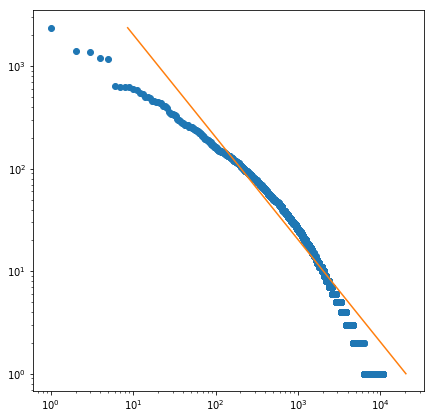

In [107]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(stemm_counts["r"], 
         stemm_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
stemm_counts['pred'] = np.median(stemm_counts.rPr) / (stemm_counts.Pr/100)

plt.plot(stemm_counts["pred"],
         stemm_counts["freq"],
         linestyle='-',
         marker='')

###Discussão do resultado obtido em comparação aos tokens sem stemming:

Percebe-se uma diferença para os ranks mais baixos e ranks mais altos. Isso ocorre porque com o processo de stemmização das palavras o número do vocabulario diminui, alguns radicais se repetem várias vezes para certas palavras que possuem o mesmo radical. 

A frequências ficaram um pouco mais igualitárias em comparação ao gráfico das palvras sem stemming. Palavras sem stemming podem ser muito diferentes entre si, e as palavras stemmizadas, são palravas iguais para o mesmo radical. 

A ideia principal é: "erra nos rankings baixos. Devido ao uso de stemming, aumentou a frequencia dos algumas palavras e diminuiu de outras que antes estavam muito grande, isso ocorre porque houve uma redução da palavra ao radical,  e alguns radicais de palavras que antes não tinham uma frequência muito grande, agora podem aparecer com maior frequência."

## Bigramas de Stemms

In [108]:
#GERANDO OS BIGRAMAS

bigram = nltk.bigrams(stemms_words)
list_bigram_aux = []
bigram_aux = ''

final_bigram = list(bigram)
for item in final_bigram:
  bigram_aux = item[0]+' '+item[1]
  list_bigram_aux.append(bigram_aux)
 
list_bigram_aux

['juíz feder',
 'feder ivan',
 'ivan silv',
 'silv brasíl',
 'brasíl proib',
 'proib carát',
 'carát limin',
 'limin nest',
 'nest sexta-f',
 'sexta-f forç',
 'forç arm',
 'arm comemor',
 'comemor espec',
 'espec dinh',
 'dinh públic',
 'públic aniversári',
 'aniversári golp',
 'golp est',
 'est instaur',
 'instaur ditad',
 'ditad milit',
 'milit brasil',
 'brasil milit',
 'milit pref',
 'pref març',
 'març abril',
 'abril part',
 'part presid',
 'presid ultradireit',
 'ultradireit jair',
 'jair bolsonar',
 'bolsonar depois',
 'depois tent',
 'tent suaviz',
 'suaviz ord',
 'ord cit',
 'cit par',
 'par rememor',
 'rememor par',
 'par silv',
 'silv text',
 'text divulg',
 'divulg pel',
 'pel minist',
 'minist defês',
 'defês com',
 'com ord',
 'ord alus',
 'alus març',
 'març lid',
 'lid algum',
 'algum quartel',
 'quartel compat',
 'compat process',
 'process reconstruç',
 'reconstruç democrá',
 'democrá promov',
 'promov pel',
 'pel constitu',
 'constitu desobedec',
 'desobedec princíp

In [109]:
#CONTANDO A FREQUENCIA DOS BIGRAMAS

bigramWords = pd.DataFrame(list_bigram_aux, columns=['bigram'])
bigram_counts = bigramWords.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']


bigram_counts

,bigram,freq
0,red soc,60
1,est unid,59
2,além diss,53
3,pel menos,49
4,milhã real,48
5,bilhã real,46
6,assim com,42
7,forç arm,41
8,jair bolsonar,34
9,rein unid,34


In [0]:
#PROBABILIDADE E C DOS BIGRAMAS
total_bigram_words = len(list_bigram_aux)
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')
bigram_counts['Pr'] =  (bigram_counts.freq / total_bigram_words)*100
bigram_counts['rPr'] = (bigram_counts.r*word_counts.Pr)/100

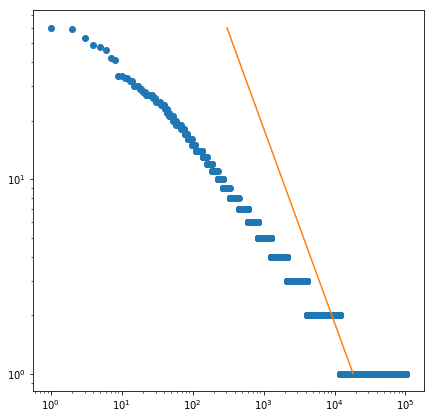

In [111]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], 
         bigram_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
bigram_counts['pred'] = np.mean(bigram_counts.rPr) / (bigram_counts.Pr/100)

plt.plot(bigram_counts["pred"],
         bigram_counts["freq"],
         linestyle='-',
         marker='')

### Discussão do resultado obtido em comparação aos bigramas sem stemming

Pode-se dizer que temos um algortimo bem ineficiente dentro de suas próprias limitações. É muito improvável de um bigrama de radicais ocorrer muitas vezes, uma vez que as palavras consecutivas com radicais A e B devem possuir outras ocorrências dentro do bigramas com a mesma combinação de radicais. 